<a href="https://colab.research.google.com/github/maximilianoPizarro/JupyterNotebook/blob/master/wines_model_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO: Calidad de Vinos


**Descripción del proyecto:** En este proyecto vamos a implementar los algoritmos de clasificacion de Sklearn

**Indice:**


0.   [Preparando el entorno](#section0)
1.  [Entendimiento del negocio](#section1)
2.  [Entendimiento de los datos](#section2)
3.  [Modelado](#section3)
4.  [Preparación de los datos](#section4)
5.  [Implementación](#section5)
6.  [Evaluación](#section6)
7.  [Presentación](#section7)
8.  [Exportar Modelo](#section8)
9.  [Importar Modelo](#section9)
10.  [Subir Modelo a Google Drive](#section10)




###0) Preparando el entorno



Pasos de control

**0.**   Controlar que el entorno este configurado con python 3 (menu -> Entorno de ejecución -> Cambiar tipo de entorno de Ejecución)<br/>
**1.**   Instalar las librerias necesarias (haciendo uso de ! y apt-get o pip)<br/>
**2.**   Importar modulos <br/>
**3.**   Cargar al servidor la base de datos<br/>

In [0]:
#1 Instalar librerias

In [0]:
#2 importar librerias
import pandas as pd #libreria para trabajar matrices de datos
import matplotlib.pyplot as plt #libreria de visualizaciones
import seaborn as sns #frame de visualizaciones sobre matplotlib
import numpy as np
%matplotlib inline
#mostrar las visualizaciones en el entorno de manera predeterminada.

In [127]:
#3 Descargar la bd
!wget -O wine.csv "https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs"

--2019-05-28 15:28:22--  https://drive.google.com/uc?export=download&id=1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs
Resolving drive.google.com (drive.google.com)... 74.125.195.113, 74.125.195.139, 74.125.195.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g32e5bqu7tqpn264gdstf1cfnsbregid/1559052000000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download [following]
--2019-05-28 15:28:23--  https://doc-0s-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g32e5bqu7tqpn264gdstf1cfnsbregid/1559052000000/11351302820947401900/*/1bexD-rAY7b0-XQhWd9p51Us1UhcQ_qZs?e=download
Resolving doc-0s-as-docs.googleusercontent.com (doc-0s-as-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-0s-as-docs.googleusercontent.com (doc-0s

###1) Entendimiento del Negocio

In [0]:
df = pd.DataFrame(pd.read_csv(filepath_or_buffer='wine.csv',sep=",",index_col=0))

Se estudiará un dataset de vinos y se armara un modelo para predecir su calidad

In [129]:
print(df.describe()) #repasando las variables

       fixed acidity  volatile acidity  ...      alcohol      quality
count    5197.000000       5197.000000  ...  5197.000000  5197.000000
mean        7.213854          0.338667  ...    10.493907     5.818164
std         1.287939          0.164251  ...     1.194671     0.873126
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]


###2) Entendimiento de los Datos



In [130]:
df.describe() #descripción de la bd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.213854,0.338667,0.318628,5.469983,0.056053,30.733019,115.941409,0.994686,3.217333,0.529529,10.493907,5.818164
std,1.287939,0.164251,0.146342,4.715483,0.035773,17.571323,56.604841,0.002933,0.159624,0.148697,1.194671,0.873126
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.230000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992370,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.200000,0.064000,42.000000,156.000000,0.996960,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,146.500000,366.500000,1.010300,4.010000,2.000000,14.900000,9.000000


In [131]:
df.info() #Viendo el tipo de dato

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 0 to 5196
Data columns (total 13 columns):
fixed acidity           5197 non-null float64
volatile acidity        5197 non-null float64
citric acid             5197 non-null float64
residual sugar          5197 non-null float64
chlorides               5197 non-null float64
free sulfur dioxide     5197 non-null float64
total sulfur dioxide    5197 non-null float64
density                 5197 non-null float64
pH                      5197 non-null float64
sulphates               5197 non-null float64
alcohol                 5197 non-null float64
quality                 5197 non-null int64
type                    5197 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 568.4+ KB


In [132]:
#Convertimos variables cualitativas en variables discretas
#Dividimos el dataset segun la variable target en este caso se trata de calidad
df.type=df.type=="red"
X = df.drop(columns=['quality'])
y = df["quality"] #variable target]
X_names = sorted(pd.read_csv(filepath_or_buffer='wine.csv',sep=",",index_col=0))
X_names


['alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'quality',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'type',
 'volatile acidity']

**Recordamos que la distirbución de la variable target no tenia una distribución normal**

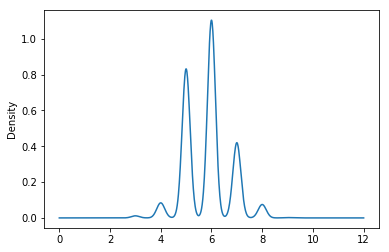

In [133]:
#distribución de la calidad
df['quality'].plot.kde()


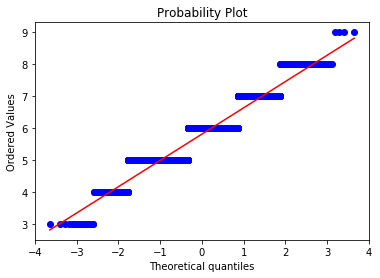

In [134]:
from scipy import stats #visualizar la distribución de probabilidades
#sirve para comprender si la variable en estudio tiene una distirbución normal
#necesaria para aplicar modelos paramétricos
stats.probplot(df['quality'], plot=plt)
plt.show()


Veremos en la etapa de preparación de los datos como corregir este problema.


### 3) Modelado


Usaremos modelo de clasificacion de sklearn



---

***Nota:**  Veamos que nos ofrece la libreria a utilizar para clasificacion (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

###4) Preparación de los datos

En esta etapa preparaemos el dataset



4.1) Split Dataset

In [0]:
from sklearn.model_selection import train_test_split

debemos definir 2 elementos:
1.   El porcentaje de registros que utilizaremos para testear
2.   Un valor aleatorio fijo para mantener la reproducción del experimento



In [0]:
test_size = 0.3 # 30% de la población (usualmente se elige entre un 30 y un 15% según la cantidad de registros)
RANDOM_STATE = 42 #un valor aleatorio

In [0]:
#por motivos de comparación tendremos separadas en 2 bds sin modificar
#raw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)



In [138]:
print("train: {} vs test {}".format(len(X_train), len(X_test)))

train: 3637 vs test 1560


###5) Implementación

5.1) Modelo Clasificacion

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification #importamos el modelo a utilizar
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

**No estandarizado**

In [140]:

clasificacion = RandomForestClassifier(n_estimators=100, max_depth=2,min_samples_leaf=2,
                              random_state=42)

clasificacion.fit(X_train, y_train)
y_pred = clasificacion.predict(X_test) 


confusion_matrix(y_test,y_pred) 

array([[  0,   0,   0,   3,   0,   0,   0],
       [  0,   0,  23,  27,   0,   0,   0],
       [  0,   0, 265, 265,   0,   0,   0],
       [  0,   0, 127, 540,   0,   0,   0],
       [  0,   0,   9, 251,   0,   0,   0],
       [  0,   0,   1,  48,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

5.2)Puntuación de Precisión

In [141]:
accuracy_score(y_test,y_pred)*100

51.60256410256411

##6) Evaluación

In [0]:
from sklearn.metrics import mean_squared_error #más info: http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

6.1) Evaluamos con metodo de error medio cuadrado

In [143]:
#dataset sin estandarizar
MSE = mean_squared_error(y_test, y_pred)
print("MSE = {}".format(MSE))

MSE = 0.6711538461538461


##7) Impacto de variables

In [144]:
[print("{} : {:.4f}".format(x, y)) for x, y in zip(X_names, clasificacion.feature_importances_)]


alcohol : 0.0075
chlorides : 0.1201
citric acid : 0.0651
density : 0.0151
fixed acidity : 0.1283
free sulfur dioxide : 0.0372
pH : 0.0315
quality : 0.2261
residual sugar : 0.0113
sulphates : 0.0041
total sulfur dioxide : 0.3439
type : 0.0096


[None, None, None, None, None, None, None, None, None, None, None, None]

##8) Exportar modelo

In [0]:
from sklearn.externals import joblib

In [146]:
joblib.dump(clasificacion, "clasificacion.joblib")

['clasificacion.joblib']

##9) Importar modelo

In [0]:
from joblib import dump, load

In [0]:
cargar_modelo = load("clasificacion.joblib")

9.1) Importamos nuevo dataset 

In [0]:
import requests,io
import pandas as pd #libreria para trabajar matrices de datos


In [0]:
url="https://raw.githubusercontent.com/maximilianoPizarro/JupyterNotebook/master/wine_test_predict.csv"
s=requests.get(url).content

dframe = pd.DataFrame(pd.read_csv(io.StringIO(s.decode('utf-8')),index_col=0))
dframe.type=dframe.type=="red"

9.2) Realizamos las prediccion con el modelo cargado



In [151]:
cargar_modelo.predict(dframe)

array([6, 6, 6, ..., 6, 6, 6])

9.3) Creamos un nuevo dataframe con el resultado y guardamos en archivo csv

In [0]:
resultado = pd.DataFrame(columns= ['ID', 'y_pred'])

In [0]:
resultado['ID']=dframe.index
resultado['y_pred']=cargar_modelo.predict(dframe)

In [154]:
resultado

,ID,y_pred
0,0,6
1,1,6
2,2,6
3,3,6
4,4,5
5,5,6
6,6,5
7,7,6
8,8,6
9,9,6


In [0]:
resultado.to_csv('pizarro_maximiliano-wine.csv')

##10) Publicar archivos en Drive

10.1) Descargar interface python para comunicarse con drive

In [0]:
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

10.2) Autenticar. Genera un link para auntenticar con el protocolo oauth y solicita ingresar clave privada para terminar la operacion.

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

10.3) Podemos ver el listado de documentos de nuetro drive

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [164]:
!ls

adc.json	      pizarro_maximiliano-wine.csv  wine.csv
clasificacion.joblib  sample_data


10.4) Subo el csv resultado con permisos de acceso publico


In [159]:
#https://drive.google.com/open?id={el ID resultante}

uploaded = drive.CreateFile({'title': 'pizarro_maximiliano-wine.csv'})
uploaded.SetContentFile('pizarro_maximiliano-wine.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id'))) 
permission = uploaded.InsertPermission({
                        'type': 'anyone',
                        'value': 'anyone',
                        'role': 'reader'})
#muetra link de descarga con permiso y sin permiso
print(uploaded['alternateLink'])


Uploaded file with ID 1JZvGiaO-xnlt7Bl7v1eihmMAAklQs19K
https://drive.google.com/file/d/1JZvGiaO-xnlt7Bl7v1eihmMAAklQs19K/view?usp=drivesdk


10.5) Subo el modelo con permisos de acceso publico


In [119]:
#https://drive.google.com/open?id={el ID resultante}

uploaded = drive.CreateFile({'title': 'clasificacion.joblib'})
uploaded.SetContentFile('clasificacion.joblib')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id'))) 
print('https://drive.google.com/open?id='+uploaded.get('id')) 
permission = uploaded.InsertPermission({
                        'type': 'anyone',
                        'value': 'anyone',
                        'role': 'reader'})
#muetra link de descarga con permiso y sin permiso
print(uploaded['alternateLink'])

Uploaded file with ID 19Oo9pf2G0joKHkofQPiRxvaM-2P7F569
https://drive.google.com/open?id=19Oo9pf2G0joKHkofQPiRxvaM-2P7F569
https://drive.google.com/file/d/19Oo9pf2G0joKHkofQPiRxvaM-2P7F569/view?usp=drivesdk


10.6) Subo el modelo con permisos de acceso publico

In [0]:
#https://drive.google.com/open?id={el ID resultante}
uploaded = drive.CreateFile({'title': 'wine.csv'})
uploaded.SetContentFile('wine.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id'))) 
permission = uploaded.InsertPermission({
                        'type': 'anyone',
                        'value': 'anyone',
                        'role': 'reader'})
#muetra link de descarga con permiso y sin permiso
print(uploaded['alternateLink'])


Uploaded file with ID 13Th_j4NP3IsvQNwt2lc-mrNFgP3icSkD
https://drive.google.com/open?id=13Th_j4NP3IsvQNwt2lc-mrNFgP3icSkD
